# <center> Test PT. Sinarmas Finance _ Data Scientist

### Upload dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('train1.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#check 10 initial data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis (EDA)

Summarize the titanic dataset

In [5]:
def summarize_dataset(df):
    summary = pd.DataFrame(df.dtypes, columns=['Data Types'])
    summary = summary.reset_index()
    summary['Missing Values'] = df.isnull().sum().values
    summary['Unique Values'] = df.nunique().values
    
    return summary


In [6]:
display(summarize_dataset(titanic))

,index,Data Types,Missing Values,Unique Values
0,PassengerId,int64,0,891
1,Survived,int64,0,2
2,Pclass,int64,0,3
3,Name,object,0,891
4,Sex,object,0,2
5,Age,float64,177,88
6,SibSp,int64,0,7
7,Parch,int64,0,7
8,Ticket,object,0,681
9,Fare,float64,0,248


### Handling Missing Values

Drop cabin column

In [7]:
titanic=titanic.drop(columns='Cabin')

In [8]:
display(summarize_dataset(titanic))

,index,Data Types,Missing Values,Unique Values
0,PassengerId,int64,0,891
1,Survived,int64,0,2
2,Pclass,int64,0,3
3,Name,object,0,891
4,Sex,object,0,2
5,Age,float64,177,88
6,SibSp,int64,0,7
7,Parch,int64,0,7
8,Ticket,object,0,681
9,Fare,float64,0,248


In [9]:
#fiil the missing values in age columns with mean age
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic['Age'].mode()

0    24.0
dtype: float64

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

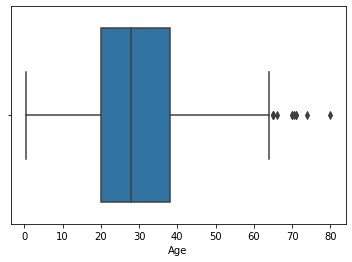

In [11]:
sns.boxplot(titanic['Age'])

fill age missing value with mean age

In [12]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [13]:
#cek missing value 
display(summarize_dataset(titanic))

,index,Data Types,Missing Values,Unique Values
0,PassengerId,int64,0,891
1,Survived,int64,0,2
2,Pclass,int64,0,3
3,Name,object,0,891
4,Sex,object,0,2
5,Age,float64,0,88
6,SibSp,int64,0,7
7,Parch,int64,0,7
8,Ticket,object,0,681
9,Fare,float64,0,248


fill missing values of Embarked with mode

In [14]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
titanic['Embarked'].mode()

0    S
dtype: object

In [16]:
titanic["Embarked"] = titanic["Embarked"].fillna(titanic["Embarked"].value_counts().index[0])

In [17]:
#cek missing value 
display(summarize_dataset(titanic))

,index,Data Types,Missing Values,Unique Values
0,PassengerId,int64,0,891
1,Survived,int64,0,2
2,Pclass,int64,0,3
3,Name,object,0,891
4,Sex,object,0,2
5,Age,float64,0,88
6,SibSp,int64,0,7
7,Parch,int64,0,7
8,Ticket,object,0,681
9,Fare,float64,0,248


In [18]:
#Drop Name column,pessengerID, Ticket, Fare (personal data)
titanic = titanic.drop(columns = ["PassengerId", "Name", "Ticket"])

In [19]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [20]:
display(summarize_dataset(titanic))

,index,Data Types,Missing Values,Unique Values
0,Survived,int64,0,2
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,0,88
4,SibSp,int64,0,7
5,Parch,int64,0,7
6,Fare,float64,0,248
7,Embarked,object,0,3


# Univariate and Bivariate analysis

In [23]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


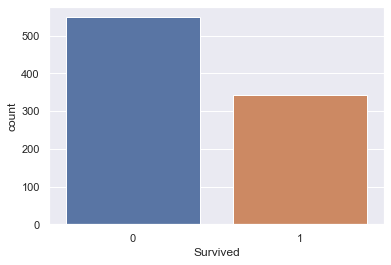

In [25]:
sns.set()
sns.countplot('Survived', data=titanic);

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


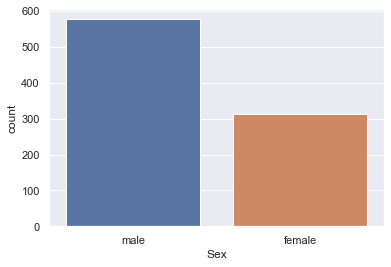

In [26]:
sns.countplot('Sex', data=titanic);

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


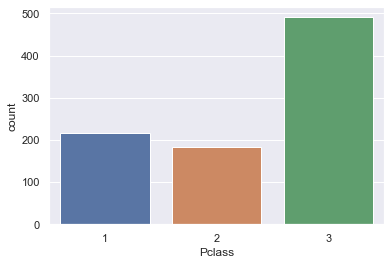

In [67]:
sns.countplot('Pclass', data=titanic);

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


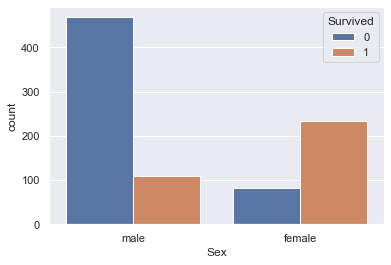

In [61]:
sns.countplot('Sex', hue='Survived', data=titanic);

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


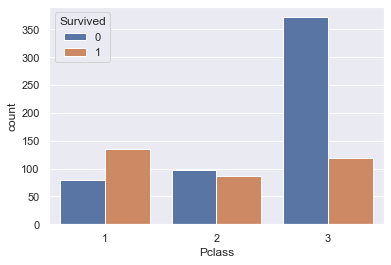

In [69]:
sns.countplot('Pclass', hue='Survived', data=titanic);

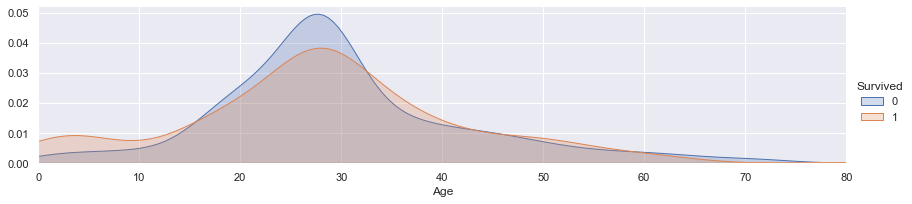

In [36]:
facet = sns.FacetGrid(titanic, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend() 
plt.show()

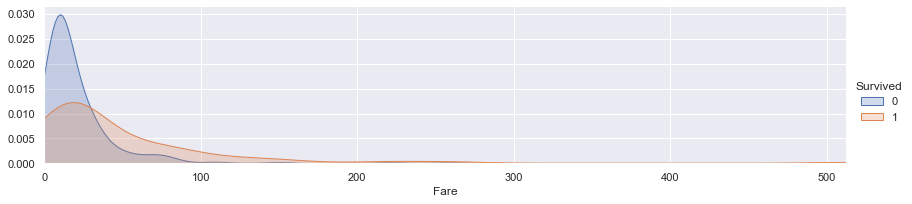

In [37]:
facet = sns.FacetGrid(titanic, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, titanic['Fare'].max()))
facet.add_legend()
plt.show()

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


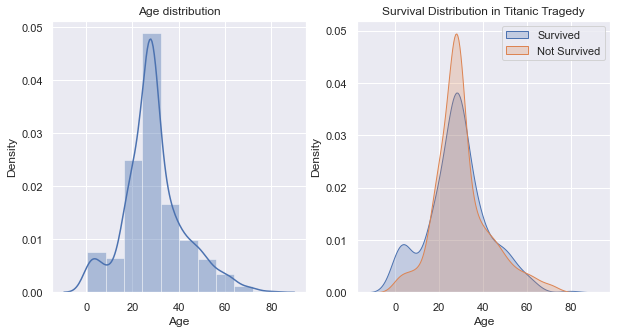

In [52]:
#Age distribution
fig, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].set_title('Age distribution')

f = sns.distplot(titanic['Age'], color='b', bins=10, ax=axarr[0])
axarr[1].set_title('Survival Distribution in Titanic Tragedy')

g = sns.kdeplot(titanic['Age'].loc[titanic['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')

g = sns.kdeplot(titanic['Age'].loc[titanic['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')
plt.legend()

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


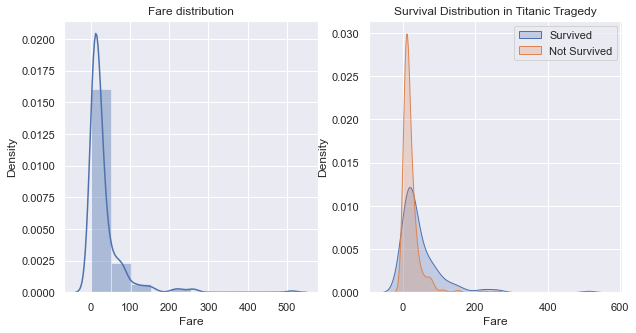

In [53]:
#Fare distribution
fig, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].set_title('Fare distribution')

f = sns.distplot(titanic['Fare'], color='b', bins=10, ax=axarr[0])
axarr[1].set_title('Survival Distribution in Titanic Tragedy')

g = sns.kdeplot(titanic['Fare'].loc[titanic['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Fare')

g = sns.kdeplot(titanic['Fare'].loc[titanic['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

plt.legend()

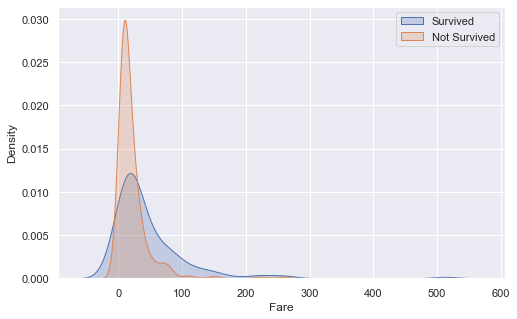

In [54]:
#Distribusi harga Tarif pada populasi Selamat dan Tidak Selamat
plt.figure(figsize=(8,5))
g = sns.kdeplot(titanic['Fare'].loc[titanic['Survived'] == 1], 
                shade= True, label='Survived').set_xlabel('Fare')
g = sns.kdeplot(titanic['Fare'].loc[titanic['Survived'] == 0], 
                shade=True, label='Not Survived')
plt.legend()

# Handling Categorical Data

Column Sex and Embarked have the object/categorical data. We must change to numeric data.

In [55]:
#buat data frame baru
titanic_new = titanic

In [56]:
titanic_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [57]:
titanic_new['Sex']=np.where(titanic_new['Sex'] =='female',0,1)
#female = 0
#male =1

In [58]:
#C=1
#Q=2
#S=3
titanic_new['Embarked']=np.where(titanic_new['Embarked'] =='C',1,(np.where(titanic_new['Embarked'] =='Q',2,3)))

In [59]:
titanic_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,3
3,1,1,0,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,3
887,1,1,0,19.0,0,0,30.0000,3
888,0,3,0,28.0,1,2,23.4500,3
889,1,1,1,26.0,0,0,30.0000,1


<AxesSubplot:>

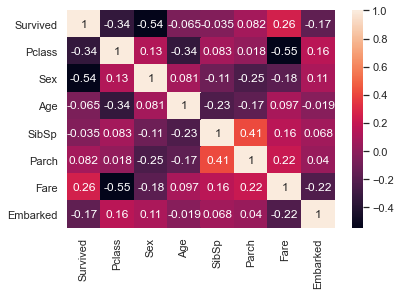

In [60]:
import seaborn as sns

gambar_corr=sns.heatmap(titanic_new.corr(), annot= True, fmt='.2g')
gambar_corr

# Scaling

In [62]:
titanic_new.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,2.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,2.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,3.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [64]:
titanic_new.iloc[:, 1:] = sc.fit_transform(titanic_new.iloc[:, 1:])

In [65]:
titanic_new.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,1,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,1,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,0,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954


# Modelling

In [66]:
#tentukan nilai X dan y
X = titanic_new.iloc[:,1:].values
y = titanic_new.iloc[:,0].values

In [67]:
#splitting into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size =0.25, random_state =0)

#### Application Modeling

#### 1.Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier()
classifier1 = classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
print(y_pred1.shape)

(223,)


In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred1 = classifier1.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)
accuracy_score(y_test, y_pred1)

[[110  29]
 [ 25  59]]


0.757847533632287

#### 2. Logistic Recression

In [70]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
accuracy_score(y_test, y_pred2)

[[116  23]
 [ 23  61]]


0.7937219730941704

### 3. Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression
classifier3= LinearRegression()
classifier3 = classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred3 = classifier3.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)
accuracy_score(y_test, y_pred3)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred3)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error (y_test, y_pred3)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred3, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

4. K-NEAREST NEIGHBORS (K-NN)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)

KNeighborsClassifier()

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred4 = classifier4.predict(X_test)
cm4 = confusion_matrix(y_test, y_pred4)
print(cm4)
accuracy_score(y_test, y_pred4)

[[119  20]
 [ 22  62]]


0.8116591928251121

In [76]:
# Perbandingan Data Asli dan Hasil Prediksi
print(np.concatenate((y_test.reshape(len(y_test), 1), y_pred4.reshape(len(y_pred4), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

In [77]:
classifier4.predict_proba(X_test)


array([[1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.4, 0.6],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0. ,

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       139
           1       0.76      0.74      0.75        84

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



# Apply Model

In [196]:
test =pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [197]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [198]:
# Hapus kolom "PassengerId", "Name", "Cabin", "Ticket"
test = test.drop(columns = ["Name", "Cabin", "Ticket"])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [199]:
display(summarize_dataset(test))

,index,Data Types,Missing Values,Unique Values
0,PassengerId,int64,0,418
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,86,79
4,SibSp,int64,0,7
5,Parch,int64,0,8
6,Fare,float64,1,169
7,Embarked,object,0,3


In [200]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [201]:
test['Age'].fillna(test['Age'].median(), inplace=True)

In [202]:
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [203]:
display(summarize_dataset(test))

,index,Data Types,Missing Values,Unique Values
0,PassengerId,int64,0,418
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,0,79
4,SibSp,int64,0,7
5,Parch,int64,0,8
6,Fare,float64,0,169
7,Embarked,object,0,3


handling categorical

In [204]:
test_new = test

In [205]:
display(summarize_dataset(test_new))

,index,Data Types,Missing Values,Unique Values
0,PassengerId,int64,0,418
1,Pclass,int64,0,3
2,Sex,object,0,2
3,Age,float64,0,79
4,SibSp,int64,0,7
5,Parch,int64,0,8
6,Fare,float64,0,169
7,Embarked,object,0,3


In [206]:
test_new['Sex']=np.where(test_new['Sex'] =='female',0,1)
#female = 0
#male =1

In [207]:
#C=1
#Q=2
#S=3
test_new['Embarked']=np.where(test_new['Embarked'] =='C',1,(np.where(test_new['Embarked'] =='Q',2,3)))

In [208]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,2
1,893,3,0,47.0,1,0,7.0000,3
2,894,2,1,62.0,0,0,9.6875,2
3,895,3,1,27.0,0,0,8.6625,3
4,896,3,0,22.0,1,1,12.2875,3


Scalling data

In [209]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_new.iloc[:,1:] = sc.fit_transform(test_new.iloc[:, 1:])

In [210]:
test_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0.873482,0.755929,0.386231,-0.499470,-0.400248,-0.497413,-0.470915
1,893,0.873482,-1.322876,1.371370,0.616992,-0.400248,-0.512278,0.700767
2,894,-0.315819,0.755929,2.553537,-0.499470,-0.400248,-0.464100,-0.470915
3,895,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.482475,0.700767
4,896,0.873482,-1.322876,-0.598908,0.616992,0.619896,-0.417492,0.700767


In [211]:
test_X = test_new.iloc[:, 1:].values
test_X

array([[ 0.87348191,  0.75592895,  0.38623105, ..., -0.4002477 ,
        -0.49741333, -0.47091535],
       [ 0.87348191, -1.32287566,  1.37137004, ..., -0.4002477 ,
        -0.51227801,  0.70076689],
       [-0.31581919,  0.75592895,  2.55353683, ..., -0.4002477 ,
        -0.46410047, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.70147553, ..., -0.4002477 ,
        -0.50779638,  0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235, ..., -0.4002477 ,
        -0.49345515,  0.70076689],
       [ 0.87348191,  0.75592895, -0.20485235, ...,  0.61989583,
        -0.23695704, -1.64259759]])

Apply modeling ( K-NN)

In [212]:
test_new_pred = classifier4.predict(test_X)

In [213]:
print(test_new_pred)

[0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0
 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0
 0 1 1 1 1 0 1 1 0 1 1]


In [214]:
test_new['Survived_Predic'] =test_new_pred
test_new['Survived_Predic']

0      0
1      0
2      0
3      1
4      1
      ..
413    1
414    1
415    0
416    1
417    1
Name: Survived_Predic, Length: 418, dtype: int64

In [224]:
test_new

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Predic
0,892,0.873482,0.755929,0.386231,-0.499470,-0.400248,-0.497413,-0.470915,0
1,893,0.873482,-1.322876,1.371370,0.616992,-0.400248,-0.512278,0.700767,0
2,894,-0.315819,0.755929,2.553537,-0.499470,-0.400248,-0.464100,-0.470915,0
3,895,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.482475,0.700767,1
4,896,0.873482,-1.322876,-0.598908,0.616992,0.619896,-0.417492,0.700767,1
...,...,...,...,...,...,...,...,...,...
413,1305,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.493455,0.700767,1
414,1306,-1.505120,-1.322876,0.740881,-0.499470,-0.400248,1.314435,-1.642598,1
415,1307,0.873482,0.755929,0.701476,-0.499470,-0.400248,-0.507796,0.700767,0
416,1308,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.493455,0.700767,1


In [215]:
test_new.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived_Predic
0,892,0.873482,0.755929,0.386231,-0.499470,-0.400248,-0.497413,-0.470915,0
1,893,0.873482,-1.322876,1.371370,0.616992,-0.400248,-0.512278,0.700767,0
2,894,-0.315819,0.755929,2.553537,-0.499470,-0.400248,-0.464100,-0.470915,0
3,895,0.873482,0.755929,-0.204852,-0.499470,-0.400248,-0.482475,0.700767,1
4,896,0.873482,-1.322876,-0.598908,0.616992,0.619896,-0.417492,0.700767,1


C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


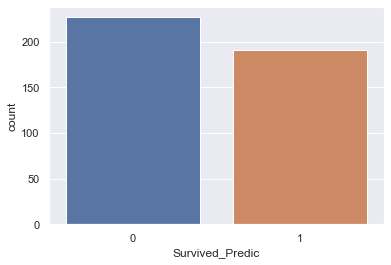

In [216]:
sns.set()
sns.countplot('Survived_Predic', data=test_new);

In [217]:
test['Sex'].value_counts()

 0.755929    266
-1.322876    152
Name: Sex, dtype: int64

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


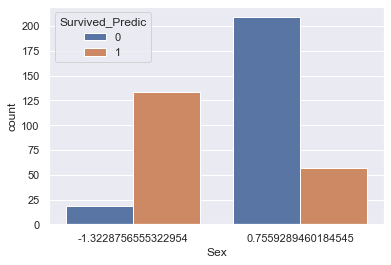

In [218]:
sns.countplot('Sex', hue='Survived_Predic', data=test_new);

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


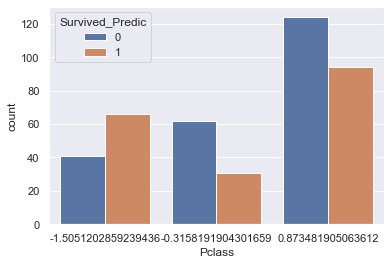

In [219]:
sns.countplot('Pclass', hue='Survived_Predic', data=test_new);

In [220]:
test_new['Age'].unique()

array([ 0.38623105,  1.37137004,  2.55353683, -0.20485235, -0.59890794,
       -1.2293969 ,  0.03158101, -0.28366347, -0.91415242, -0.67771906,
        1.29255892, -0.52009683,  2.63234795, -0.44128571,  0.42563661,
        1.2137478 ,  2.001859  , -1.6234525 ,  1.45018116,  1.6078034 ,
       -0.55950239,  0.89850332,  0.26801437, -0.87474686, -0.36247459,
        0.74088109,  2.39591459,  0.50444773, -0.75653018, -0.12604123,
       -1.54464138, -0.99296354,  0.18920325, -1.30820802,  0.11039213,
       -0.04723011, -0.08663567,  0.22860881, -1.85988586,  2.94759243,
        1.52899228, -2.17513033,  3.65689251,  1.05612556, -1.07177466,
       -2.25394145, -1.38701914,  0.97731444,  1.84423676, -0.24425791,
        0.81969221,  2.47472571,  2.43532015, -1.78107474, -1.15058578,
        1.92304788,  2.71115907,  0.58325885,  0.34682549, -1.4264247 ,
       -1.70226362, -2.3067449 ,  0.66206997,  2.15948124,  0.85909776,
       -2.26024634, -0.8353413 ,  0.54385329, -2.27364423, -2.26

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


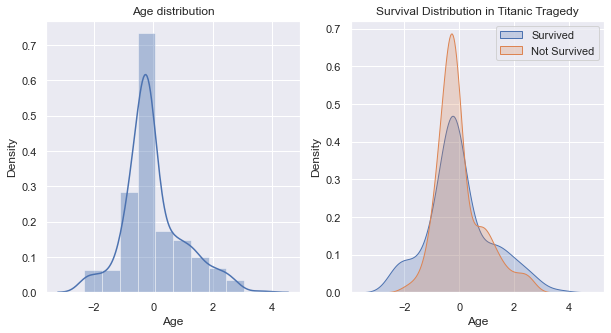

In [221]:
#Age distribution
fig, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].set_title('Age distribution')

f = sns.distplot(test_new['Age'], color='b', bins=10, ax=axarr[0])
axarr[1].set_title('Survival Distribution in Titanic Tragedy')

g = sns.kdeplot(test_new['Age'].loc[test_new['Survived_Predic'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')

g = sns.kdeplot(test_new['Age'].loc[test_new['Survived_Predic'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')
plt.legend()

C:\mtpywin\anaconda\envs\py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


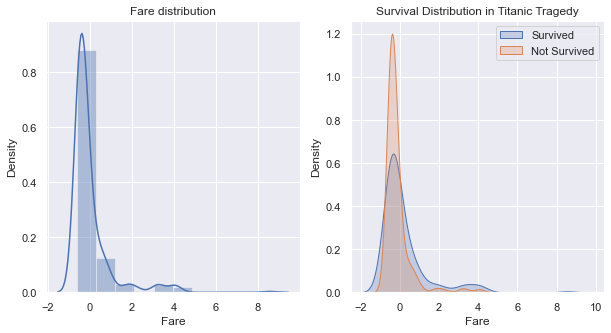

In [222]:
fig, axarr = plt.subplots(1,2,figsize=(10,5))
axarr[0].set_title('Fare distribution')

f = sns.distplot(test_new['Fare'], color='b', bins=10, ax=axarr[0])
axarr[1].set_title('Survival Distribution in Titanic Tragedy')

g = sns.kdeplot(test_new['Fare'].loc[test_new['Survived_Predic'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Fare')

g = sns.kdeplot(test_new['Fare'].loc[test_new['Survived_Predic'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')
plt.legend()

In [223]:
# Save "submission" dalam bentuk csv
test_new.to_csv("Prediction Titanic.csv", index = False)